## cVAE convergence evaluation

GANs were not good enough. Switching to VAEs because convergence is demonstrable.

In [1]:
## blob names
cgan_model_name = 'cgan-model.h5'
cvae_simulated_data_name = 'cvae-example-data.pkl'
cvae_fit_stats_name = 'cvae-fit-stats.pkl'

In [2]:
## get data from storage 
!gsutil cp gs://gdax-dnn-tmp-1/cgan-model.h5 .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-example-data.pkl .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-fit-stats.pkl . 
!gsutil cp gs://gdax-dnn-tmp-1/cgan-data.pkl .

Copying gs://gdax-dnn-tmp-1/cgan-model.h5...
/ [1 files][ 16.0 MiB/ 16.0 MiB]                                                
Operation completed over 1 objects/16.0 MiB.                                     
Copying gs://gdax-dnn-tmp-1/cvae-example-data.pkl...
/ [1 files][  3.9 MiB/  3.9 MiB]                                                
Operation completed over 1 objects/3.9 MiB.                                      
Copying gs://gdax-dnn-tmp-1/cvae-fit-stats.pkl...
/ [1 files][ 29.6 KiB/ 29.6 KiB]                                                
Operation completed over 1 objects/29.6 KiB.                                     
Copying gs://gdax-dnn-tmp-1/cgan-data.pkl...
| [1 files][  1.5 GiB/  1.5 GiB]    4.5 MiB/s                                   
Operation completed over 1 objects/1.5 GiB.                                      


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_stat(stats):
    plt.plot(stats)
    plt.show()
    pass

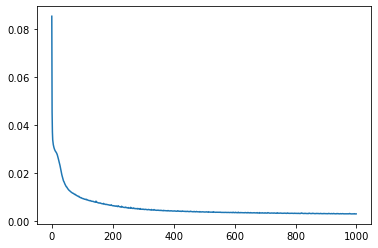

In [4]:
import pickle 
with open(cvae_fit_stats_name, 'rb') as f:
    losses = pickle.load(f)

plot_stat(losses)

In [5]:
## load pickle files 
with open(cvae_simulated_data_name, 'rb') as f:
    cvae_simulated_data = pickle.load(f)
#with open(cvae_fit_stats_name, 'rb') as f: ## does not pickle 
#    cvae_fit_stats = pickle.load(f)

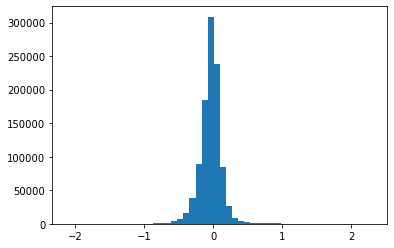

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def hist(x, num_bins=50, **kwargs):
    plt.hist(x, num_bins, **kwargs)
    plt.show()
    pass

hist(cvae_simulated_data.flatten())

In [7]:
with open('cgan-data.pkl', 'rb') as f:
    cgan_data = pickle.load(f)

In [8]:
import numpy as np
import random 
idx = np.random.choice(cgan_data[0].shape[0], 1000)
x = cgan_data[0][idx,:]

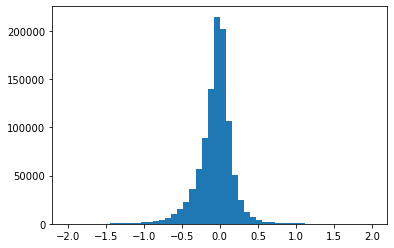

In [9]:
hist(x.flatten(), range=(-2, 2))